In [2]:
!pip install fastai --upgrade

     |████████████████████████████████| 187 kB 606 kB/s eta 0:00:01
     |████████████████████████████████| 42 kB 771 kB/s eta 0:00:011
  Attempting uninstall: fastcore
    Found existing installation: fastcore 1.0.20
    Uninstalling fastcore-1.0.20:
      Successfully uninstalled fastcore-1.0.20
  Attempting uninstall: fastai
    Found existing installation: fastai 2.0.15
    Uninstalling fastai-2.0.15:
      Successfully uninstalled fastai-2.0.15


In [3]:
from fastai.vision.all import *
import matplotlib.pyplot as plt



import matplotlib.pyplot as plt


In [4]:
path = Path('../input/covid19-radiography-database/COVID-19 Radiography Database')

In [5]:
files = get_image_files(path)

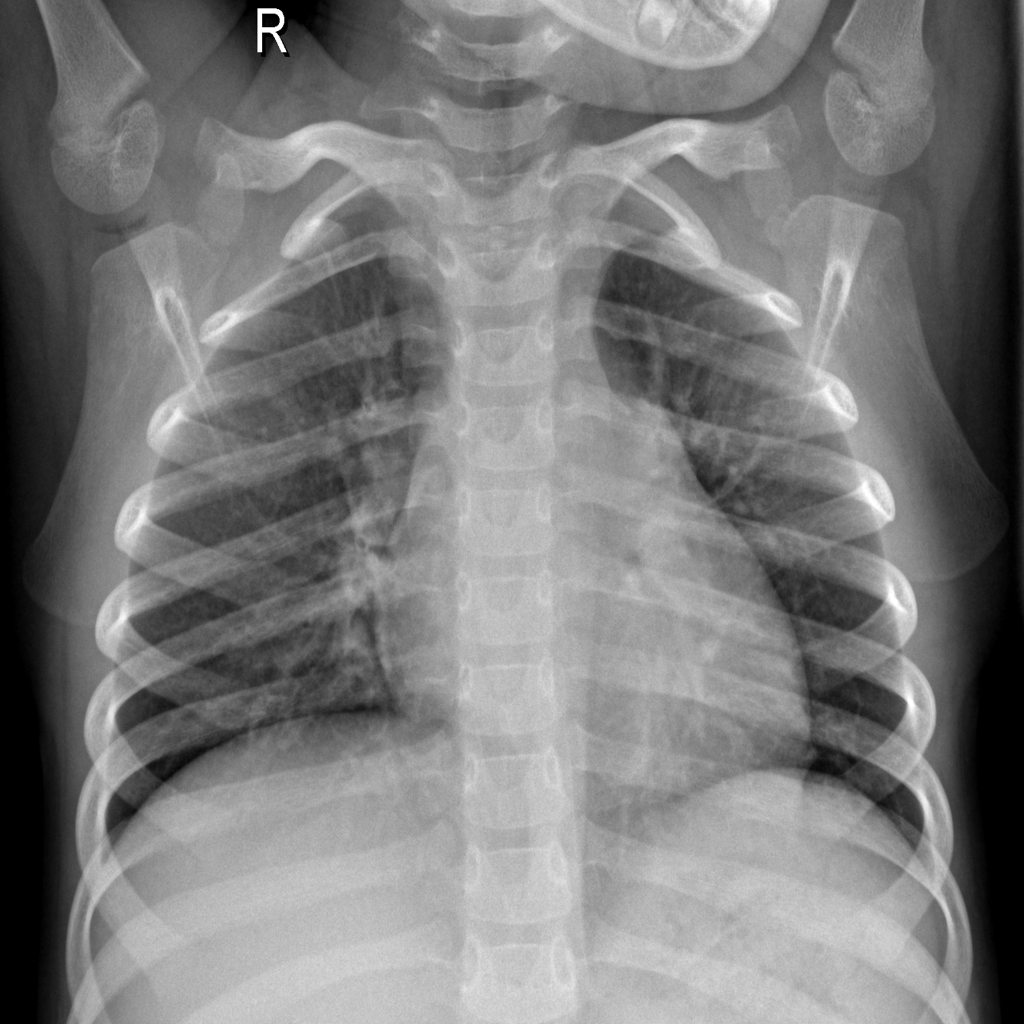

In [6]:
import PIL
img = PIL.Image.open(files[0])
img

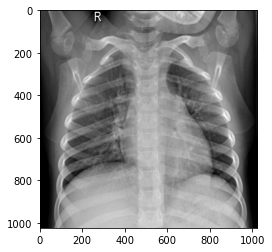

In [20]:
plt.imshow(img, cmap='gray')

*  Random Resized Crop

*  Rotate
*  Brightness
*  RandomErasing

*  Zoom
*  Wrap
*  Contest

# RandomResiziedCrop

**Picks a random scaled crop of an image and resize it to size**

In [9]:
import re
def label_func(fname):
    return fname.parent.name

In [36]:
dblock  = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   item_tfms = RandomResizedCrop(128, min_scale=0.35), 
                   batch_tfms=Normalize.from_stats(*imagenet_stats))

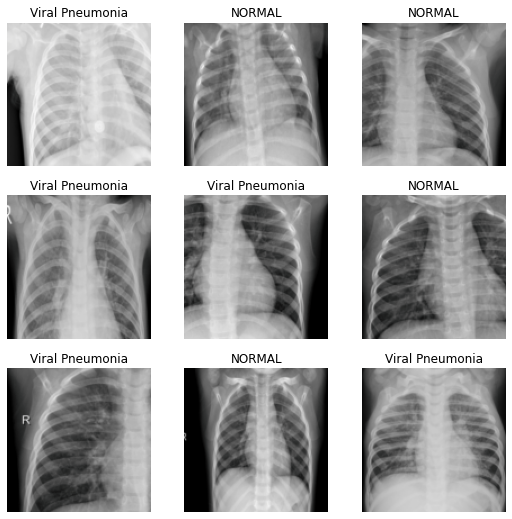

In [37]:
dls = dblock.dataloaders(path)
dls.show_batch()

# Rotate - 45 degrees

**Apply a random rotation of at most max_deg with probability p to a batch of images**

In [29]:
dblock  = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   batch_tfms=[Rotate(max_deg=45, p=1.),Normalize.from_stats(*imagenet_stats)])

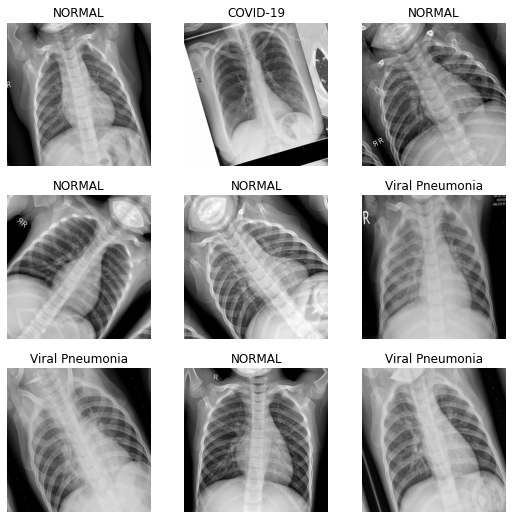

In [30]:
dls = dblock.dataloaders(path)
dls.show_batch()

# brightness

In [66]:
dblock  = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   batch_tfms=[Brightness(max_lighting=0.2, p=1.),Normalize.from_stats(*imagenet_stats)])

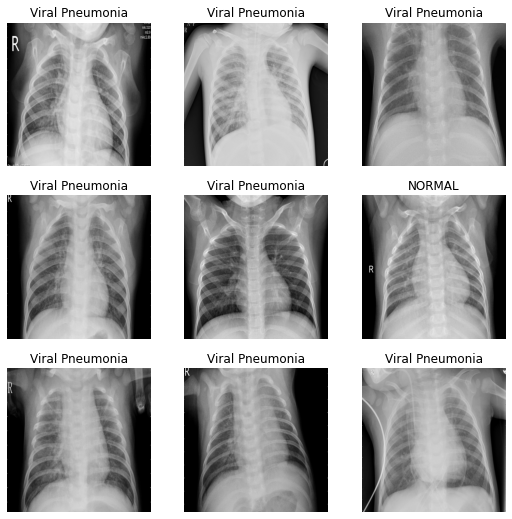

In [67]:
dls = dblock.dataloaders(path)
dls.show_batch()

# Random Erasing - paperlink [https://arxiv.org/pdf/1708.04896.pdf](http://)

In [40]:
dblock  = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   batch_tfms=[RandomErasing(p=1., max_count=10, min_aspect=0.5, sl=0.2, sh=0.2),Normalize.from_stats(*imagenet_stats)])

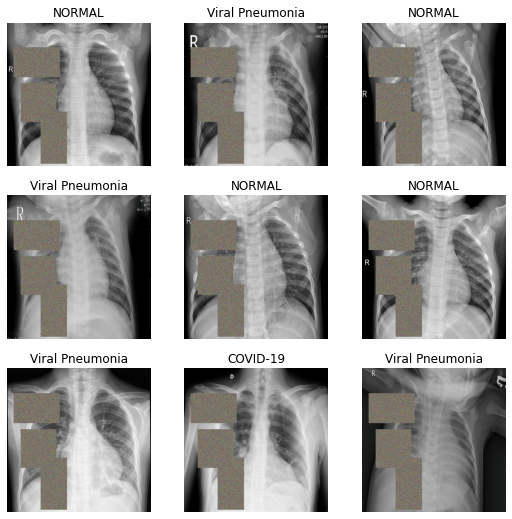

In [41]:
dls = dblock.dataloaders(path)
dls.show_batch()

# Zoom

In [58]:
dblock  = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   batch_tfms=[Zoom(max_zoom=2.1, p=0.5),Normalize.from_stats(*imagenet_stats)])

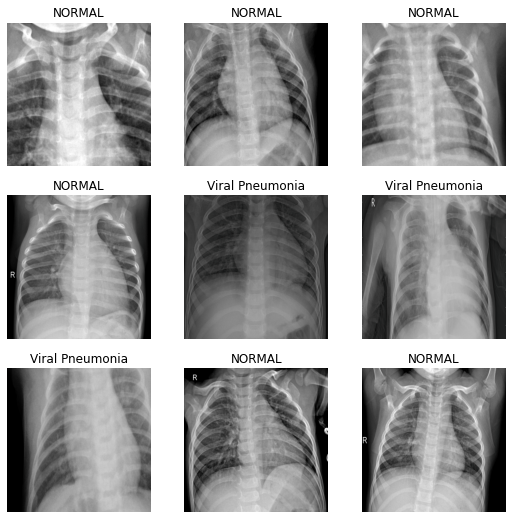

In [59]:
dls = dblock.dataloaders(path)
dls.show_batch()

# Wrap

**Apply perspective warping with magnitude and p on a batch of matrices**

In [60]:
dblock  = DataBlock(blocks    = (ImageBlock, CategoryBlock),
                   get_items = get_image_files,
                   get_y     = label_func,
                   splitter  = RandomSplitter(),
                   batch_tfms=[Warp(magnitude=0.2, p=1.0),Normalize.from_stats(*imagenet_stats)])

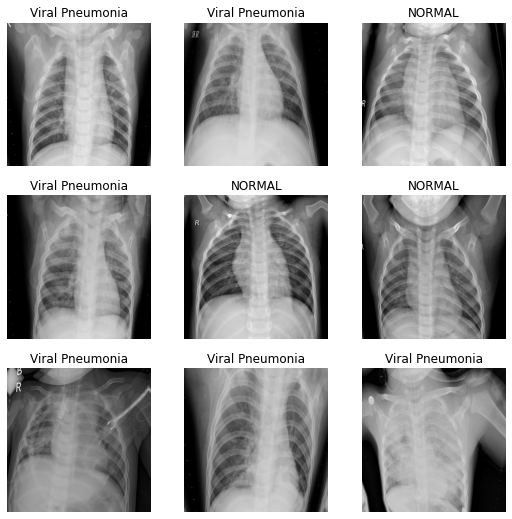

In [61]:
dls = dblock.dataloaders(path)
dls.show_batch()